<a href="https://colab.research.google.com/github/Dorian-MasterThesis/Application-of-ML-and-statistical-models-in-mitigating-climate-change-effects-for-subsistence-farmin/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter

In [ ]:
# List all files in the current directory
print(os.listdir('.'))

['.config', 'Oshikoto Region Climate Data 1.csv', 'Kavango Region Climate Data,Namibia.csv', 'Ohangwena Climate Data,Namibia.csv', 'Omusati Region Climate Data,Raw Data.csv', 'sample_data']


In [ ]:
# List of region dataset files
regions_files = [
    'Kavango Region Climate Data,Namibia.csv',
    'Ohangwena Climate Data,Namibia.csv',
    'Oshikoto Region Climate Data 1.csv',
    'Omusati Region Climate Data,Raw Data.csv'
]

In [ ]:
# Combine all datasets into one DataFrame, handling errors
combined_df = pd.concat(
    [pd.read_csv(file, on_bad_lines='skip') for file in regions_files],
    ignore_index=True
)

In [ ]:
# Convert 'datetime' to datetime objects with dayfirst=True
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], dayfirst=True)

In [ ]:
print(combined_df.head(50))

# Save the updated DataFrame with the new columns
combined_df.to_csv('DF44.csv', index=False)

               StationName   datetime  tempmax  tempmin  tempavg  Unnamed: 5  \
0   Mpungu,Kavango,Namibia 1998-01-01      0.0      0.0      NaN         0.0   
1   Mpungu,Kavango,Namibia 1998-01-02      0.0      0.0      NaN         0.0   
2   Mpungu,Kavango,Namibia 1998-01-03      0.0      0.0      NaN         0.0   
3   Mpungu,Kavango,Namibia 1998-01-04      0.0      0.0      NaN         0.0   
4   Mpungu,Kavango,Namibia 1998-01-05      0.0      0.0      NaN         0.0   
5   Mpungu,Kavango,Namibia 1998-01-06      0.0      0.0      NaN         0.0   
6   Mpungu,Kavango,Namibia 1998-01-07      0.0      0.0      NaN         0.0   
7   Mpungu,Kavango,Namibia 1998-01-08      0.0      0.0      NaN         0.0   
8   Mpungu,Kavango,Namibia 1998-01-09      0.0      0.0      NaN         0.0   
9   Mpungu,Kavango,Namibia 1998-01-10      0.0      0.0      NaN         0.0   
10  Mpungu,Kavango,Namibia 1998-01-11      0.0      0.0      NaN         0.0   
11  Mpungu,Kavango,Namibia 1998-01-12   

In [ ]:
missing_values = combined_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
StationName         58254
datetime                0
tempmax             14613
tempmin             14613
tempavg             74638
Unnamed: 5         194768
Unnamed: 6         194768
precip              87660
preciptype         207561
Unnamed: 9         194180
cloudconditions    110774
description         74638
Unnamed: 12        207917
precipprob         109446
precipcover         48545
cloudcover         120278
Station            184471
windspeed          202136
winddir            206931
dtype: int64


In [ ]:
# Extract month and year for further analysis
combined_df['month'] = combined_df['datetime'].dt.month
combined_df['year'] = combined_df['datetime'].dt.year

In [ ]:
# Define dry months
dry_months = [5, 6, 7, 8, 9]  # May to September

# Define rainy months
rainy_months = [10, 11, 12, 1, 2, 3, 4]

In [ ]:
combined_df = combined_df.drop(combined_df.columns[combined_df.columns.str.contains('199|200')], axis=1)

In [ ]:
remaining_years = [year for year in combined_df.columns if year.isdigit() and int(year) > 2002]
print(remaining_years)

[]


In [ ]:
# Handle missing values
# Replace missing values in the precipitation column with zero for dry months
combined_df.loc[combined_df['datetime'].dt.month.isin(dry_months), 'precip'] = combined_df.loc[combined_df['datetime'].dt.month.isin(dry_months), 'precip'].fillna(0)

In [ ]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Apply KNN imputation to the precipitation column for rainy months
combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), 'precip'] = imputer.fit_transform(
    combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), ['precip']]
)

In [ ]:
# Drop unnamed columns
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]

In [ ]:
# Drop the specified columns
combined_df = combined_df.drop(['Station', 'winddir'], axis=1)

In [ ]:
missing_values = combined_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
StationName         58254
datetime                0
tempmax             14613
tempmin             14613
tempavg             74638
precip                  0
preciptype         207561
cloudconditions    110774
description         74638
precipprob         109446
precipcover         48545
cloudcover         120278
windspeed          202136
month                   0
year                    0
dtype: int64


In [ ]:
# Apply KNN imputation to the precipitation column for rainy months
combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), 'precip'] = imputer.fit_transform(
    combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), ['precip']]
)

In [ ]:
# Apply KNN imputation to the specified columns for rainy months
columns_to_impute = ['tempavg', 'tempmax', 'tempmin', 'cloudcover', 'precipprob','precipcover']
combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), columns_to_impute] = imputer.fit_transform(
    combined_df.loc[combined_df['datetime'].dt.month.isin(rainy_months), columns_to_impute]
)

In [ ]:
# Apply KNN imputation to the specified columns for dry months
combined_df.loc[combined_df['datetime'].dt.month.isin(dry_months), columns_to_impute] = imputer.fit_transform(
    combined_df.loc[combined_df['datetime'].dt.month.isin(dry_months), columns_to_impute]
)

In [ ]:
missing_values = combined_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
StationName         58254
datetime                0
tempmax                 0
tempmin                 0
tempavg                 0
precip                  0
preciptype         207561
cloudconditions    110774
description         74638
precipprob              0
precipcover             0
cloudcover              0
windspeed          202136
month                   0
year                    0
dtype: int64


In [ ]:
combined_df['preciptype'] = combined_df['preciptype'].apply(lambda x: 1 if x == 'rain' else 0)

In [ ]:
missing_values = combined_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
StationName         58254
datetime                0
tempmax                 0
tempmin                 0
tempavg                 0
precip                  0
preciptype              0
cloudconditions    110774
description         74638
precipprob              0
precipcover             0
cloudcover              0
windspeed          202136
month                   0
year                    0
dtype: int64


In [ ]:
columns_to_impute = ['windspeed']

# Apply KNN imputation to the 'windspeed' column
combined_df[columns_to_impute] = imputer.fit_transform(combined_df[columns_to_impute])

In [ ]:
# Drop the specified columns
combined_df = combined_df.drop(['cloudconditions', 'description'], axis=1)

In [ ]:
missing_values = combined_df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

Missing values for each column:
StationName    58254
datetime           0
tempmax            0
tempmin            0
tempavg            0
precip             0
preciptype         0
precipprob         0
precipcover        0
cloudcover         0
windspeed          0
month              0
year               0
dtype: int64


In [ ]:
# create labels based on temperature and precipitation
def label_temperature(temp):
    if temp >= 30:
        return 'High Temperature'
    elif temp < 15:
        return 'Low Temperature'
    else:
        return 'Moderate Temperature'

def label_precipitation(precip):
    if precip >= 10:
        return 'High Precipitation'
    elif precip == 0:
        return 'No Precipitation'
    else:
        return 'Low Precipitation'

combined_df['temp_label'] = combined_df['tempavg'].apply(label_temperature)
combined_df['precip_label'] = combined_df['precip'].apply(label_precipitation)

In [ ]:
##VISUALISATION

In [ ]:
# Select relevant columns for correlation analysis
correlation_data = combined_df[['tempavg', 'precip', 'cloudcover', 'precipprob', 'windspeed']]

In [ ]:
# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

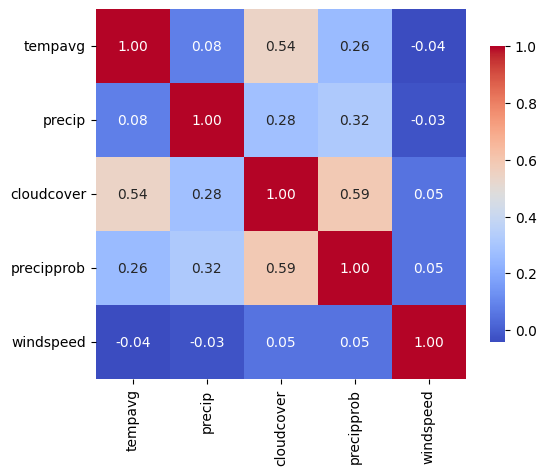

In [ ]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

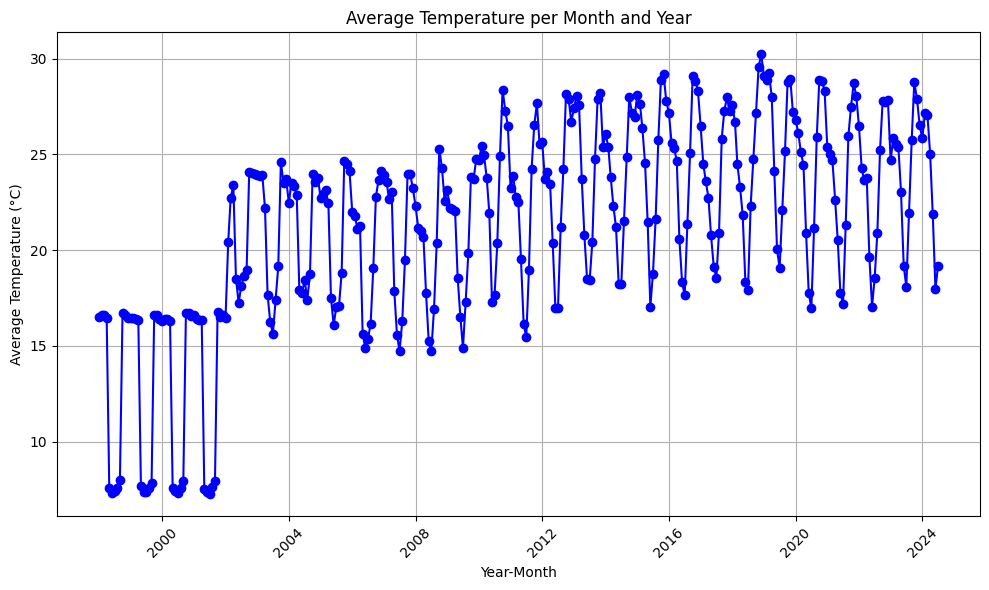

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' is in the correct format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')

# Group by year and month, then calculate the average temperature
monthly_avg_temp = combined_df.groupby([combined_df['year'], combined_df['month']])['tempavg'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_temp['year_month'] = pd.to_datetime(monthly_avg_temp[['year', 'month']].assign(day=1))

# Plotting the average temperature
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp['year_month'], monthly_avg_temp['tempavg'], marker='o', linestyle='-', color='b')
plt.title('Average Temperature per Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


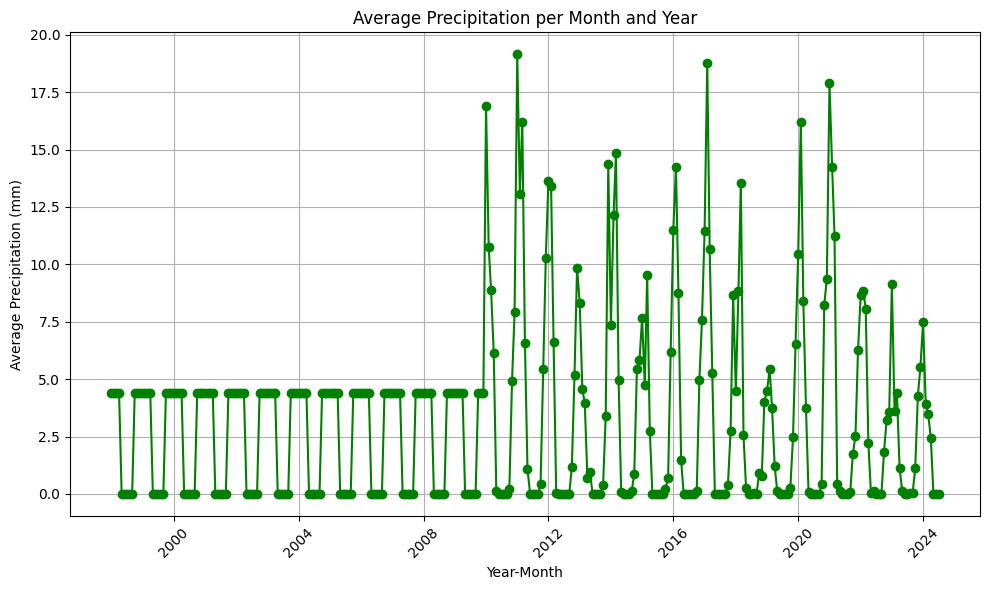

In [ ]:
# Group by year and month, then calculate the average precipitation
monthly_avg_precip = combined_df.groupby([combined_df['year'], combined_df['month']])['precip'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_precip['year_month'] = pd.to_datetime(monthly_avg_precip[['year', 'month']].assign(day=1))

# Plotting the average precipitation
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_precip['year_month'], monthly_avg_precip['precip'], marker='o', linestyle='-', color='g')
plt.title('Average Precipitation per Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
##IMPROVING PLOTS

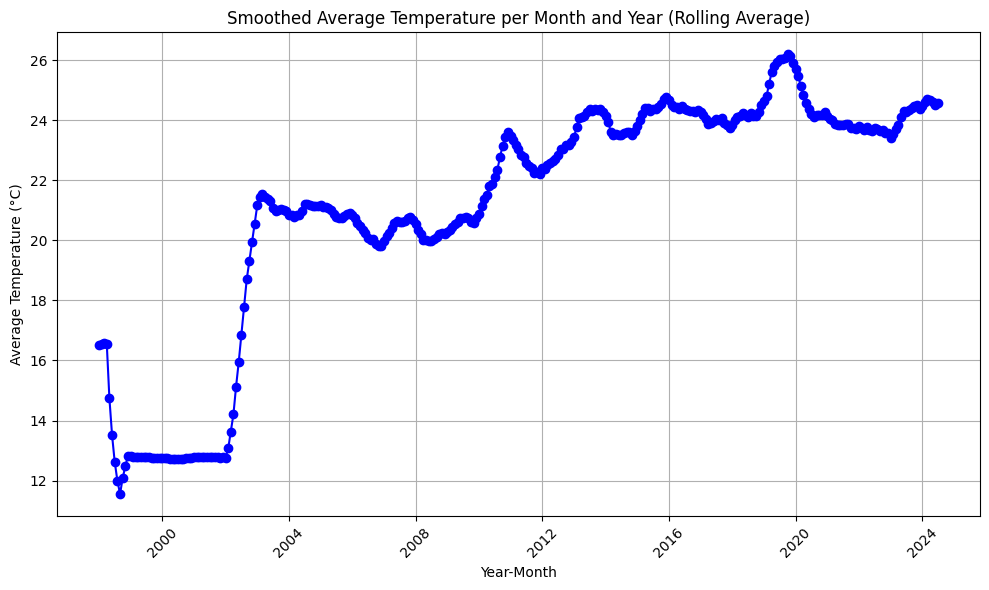

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' is in the correct format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')

# Group by year and month, then calculate the average temperature
monthly_avg_temp = combined_df.groupby([combined_df['year'], combined_df['month']])['tempavg'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_temp['year_month'] = pd.to_datetime(monthly_avg_temp[['year', 'month']].assign(day=1))

# Apply rolling average to smooth the time series (window size of 12 months)
monthly_avg_temp['tempavg_rolling'] = monthly_avg_temp['tempavg'].rolling(window=12, min_periods=1).mean()

# Plot the smoothed average temperature
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp['year_month'], monthly_avg_temp['tempavg_rolling'], marker='o', linestyle='-', color='b')
plt.title('Smoothed Average Temperature per Month and Year (Rolling Average)')
plt.xlabel('Year-Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


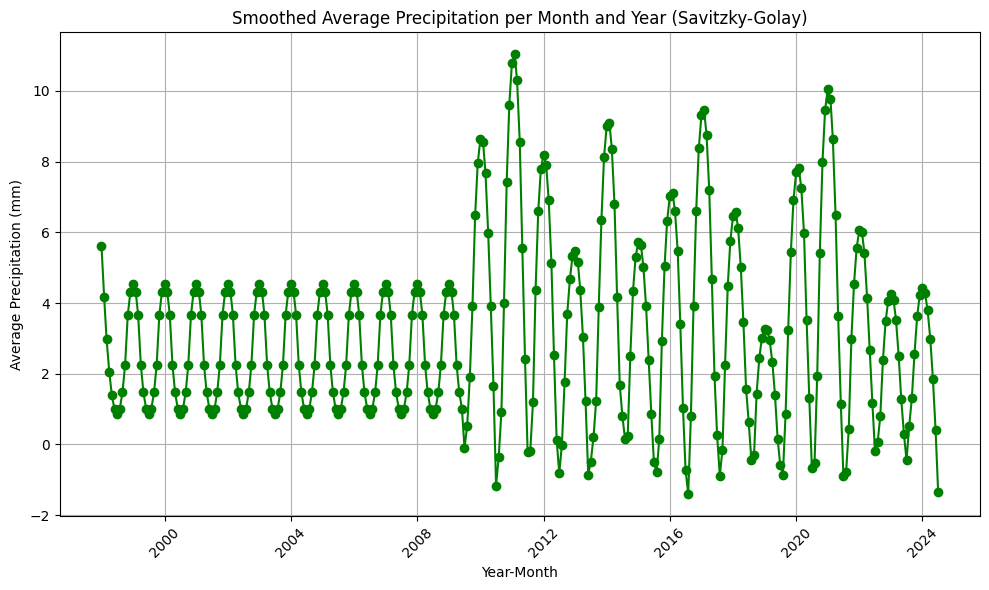

In [ ]:
from scipy.signal import savgol_filter

# Group by year and month, then calculate the average precipitation
monthly_avg_precip = combined_df.groupby([combined_df['year'], combined_df['month']])['precip'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_precip['year_month'] = pd.to_datetime(monthly_avg_precip[['year', 'month']].assign(day=1))

# Apply Savitzky-Golay filter to smooth the time series (window size of 13, polynomial order 2)
monthly_avg_precip['precip_smooth'] = savgol_filter(monthly_avg_precip['precip'], window_length=13, polyorder=2)

# Plot the smoothed average precipitation
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_precip['year_month'], monthly_avg_precip['precip_smooth'], marker='o', linestyle='-', color='g')
plt.title('Smoothed Average Precipitation per Month and Year (Savitzky-Golay)')
plt.xlabel('Year-Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


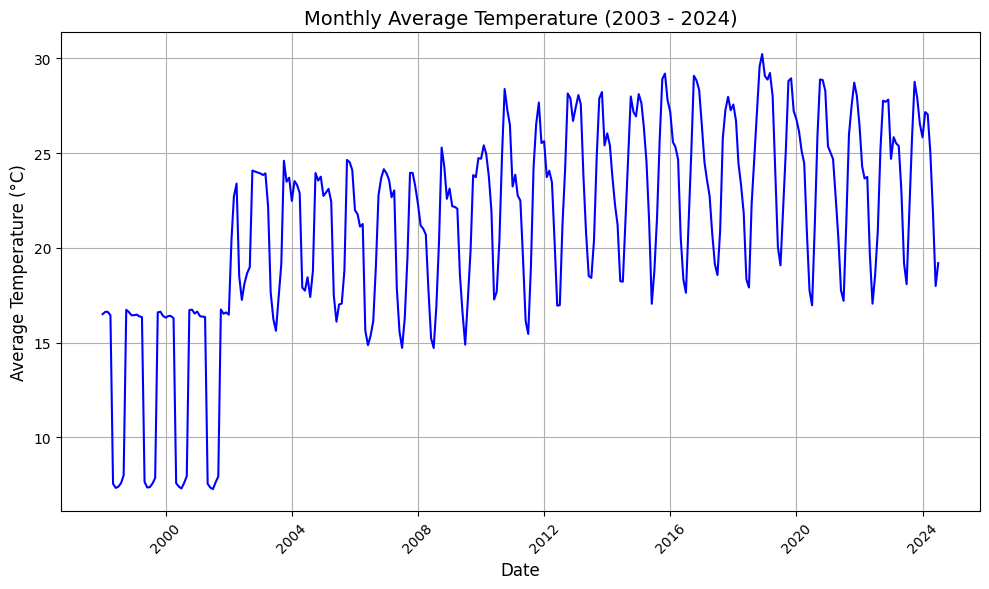

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' is in the correct format
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')

# Group by year and month, then calculate the average temperature
monthly_avg_temp = combined_df.groupby([combined_df['year'], combined_df['month']])['tempavg'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_temp['year_month'] = pd.to_datetime(monthly_avg_temp[['year', 'month']].assign(day=1))

# Plot the average temperature time series
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp['year_month'], monthly_avg_temp['tempavg'], color='b')

# Styling to match the style in the image
plt.title('Monthly Average Temperature (2003 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


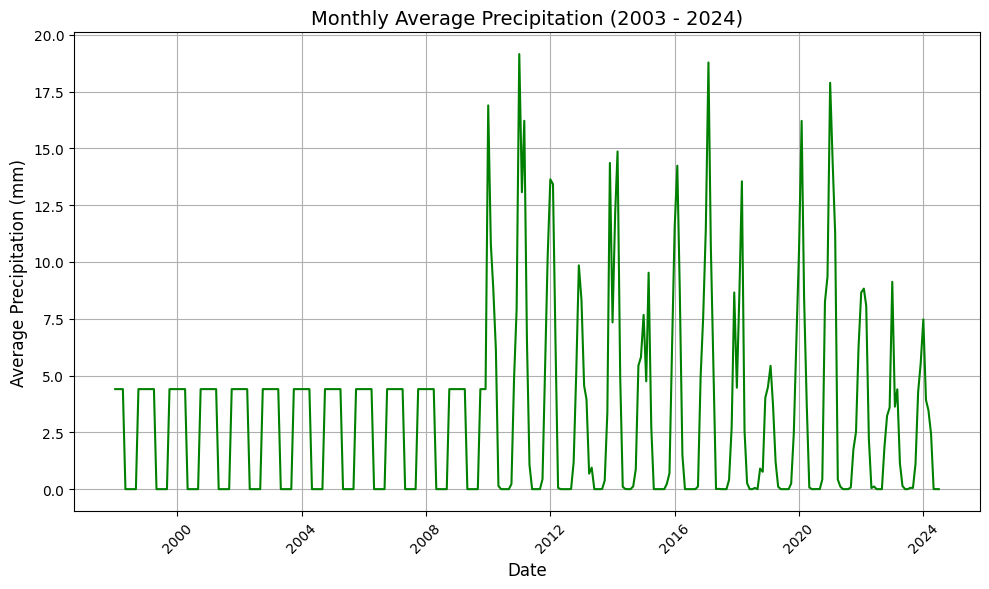

In [ ]:
# Group by year and month, then calculate the average precipitation
monthly_avg_precip = combined_df.groupby([combined_df['year'], combined_df['month']])['precip'].mean().reset_index()

# Create a 'year-month' column for better time-series plotting
monthly_avg_precip['year_month'] = pd.to_datetime(monthly_avg_precip[['year', 'month']].assign(day=1))

# Plot the average precipitation time series
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_precip['year_month'], monthly_avg_precip['precip'], color='g')

# Styling to match the style in the image
plt.title('Monthly Average Precipitation (2003 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Save the updated DataFrame with the new columns
combined_df.to_csv('df.csv', index=False)

In [ ]:
print(combined_df.columns)


Index(['StationName', 'datetime', 'tempmax', 'tempmin', 'tempavg', 'precip',
       'preciptype', 'precipprob', 'precipcover', 'cloudcover', 'windspeed',
       'month', 'year', 'temp_label', 'precip_label'],
      dtype='object')


In [ ]:
# Save the updated DataFrame with the new columns
combined_df.to_csv('df1.csv', index=False)